In [1]:
SHOW_PLOT_FLAG = True

In [2]:
import sys

sys.path.insert(0, '../')


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils import *
from constants import *
import matplotlib.gridspec as gridspec


## Loading QoE data

In [3]:
qoe_data_drive = pd.read_csv('Data-Processed/Drive_QoE.txt', sep='\t')
qoe_data_walk = pd.read_csv('Data-Processed/Walk_QoE.txt', sep='\t')

## Plotting

----- QoE Data Values -----
----Drive StallTime mmWave Drive 1.465151515151515 Bitrate 0.8087542087542088
----Walk StallTime Mid-band_walk 0.1526230769230769 Bitrate 0.6857142857142858
----Walk StallTime mmWave_walk 0.21028062109646076 Bitrate 0.8399999999999999
Showing Plot  Sec7_Fig19


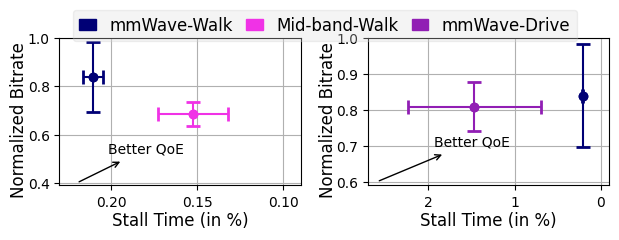

In [4]:
fig = plt.figure(figsize=(10,2.2))
gs1 = gridspec.GridSpec(1, 6, wspace=1.9, hspace=1, top=.90, bottom=0.23, left=0.2, right=0.75, figure=fig)

br = 'norm_br'
st = 'stallTime'

print('----- QoE Data Values -----')
####################=========> Plotting Drive QoE
ax0 = plt.subplot(gs1[:, 3:])

grouped_data = qoe_data_drive.groupby('config')[st].agg(['mean', 'sem']).reset_index()
# Calculate confidence interval
confidence_interval = 0.9  
grouped_data['ci_low'] = grouped_data['mean'] - confidence_interval * grouped_data['sem']
grouped_data['ci_high'] = grouped_data['mean'] + confidence_interval * grouped_data['sem']


# GRoup bitrate
grouped_data_br = qoe_data_drive.groupby('config')[br].agg(['mean', 'sem']).reset_index()

# Calculate confidence interval
confidence_interval = 0.90 # 95% confidence interval
grouped_data_br['ci_low'] = grouped_data_br['mean'] - confidence_interval * grouped_data_br['sem']
grouped_data_br['ci_high'] = grouped_data_br['mean'] + confidence_interval * grouped_data_br['sem']

for c, df in qoe_data_drive.groupby('config'):
    if c == 'mmWave':
        u = 'GER2'
        label = 'mmWave Drive'
        plotFlag = True
    elif c == 'Mid-band':
        u = 'SPA1_1'
        label = 'Mid-band Drive'
        plotFlag = False
    if plotFlag:
        print('----Drive StallTime ' + label + ' ' + str(df[st].median()) + ' Bitrate ' + str(df[br].mean()))
        ax0.scatter(df[st].median(), df[br].mean(), color=colors[u], label=c, s=20)
        grpDF = grouped_data_br[grouped_data_br['config'] == c]
        ax0.errorbar(df[st].median(), df[br].mean(), yerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                     color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)
        grpDF = grouped_data[grouped_data['config'] == c]
        ax0.errorbar(df[st].median(), df[br].mean(), 
                     xerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                    color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)


ax0.yaxis.grid(True, which='major')
ax0.xaxis.grid(True, which='major')
ax0.set_xlim(-0.1, 2.7)
ax0.set_ylim([0.59,1.0])
ax0.set_xlabel('Stall Time (in %)', fontsize=12)
ax0.set_ylabel('Normalized Bitrate', fontsize=12)
ax0.invert_xaxis() 
ax0.yaxis.set_label_coords(-0.13, 0.45)
ax0.xaxis.set_label_coords(0.5, -0.18)

ax0.annotate("Better QoE", xy=(2.6, 0.6), xycoords="data", 
    xytext=(1.5, 0.71), fontsize=10, color='k',
    va="center", ha="center", 
    bbox=dict(boxstyle="round", fc="w", alpha=0),
    arrowprops=dict(arrowstyle="<-", color='k', lw=1))


####################=========> Plotting Walk QoE
ax1 = plt.subplot(gs1[0, :3])
grouped_data = qoe_data_walk.groupby('config')[st].agg(['mean', 'sem']).reset_index()

# Calculate confidence interval
confidence_interval = 0.99
grouped_data['ci_low'] = grouped_data['mean'] - confidence_interval * grouped_data['sem']
grouped_data['ci_high'] = grouped_data['mean'] + confidence_interval * grouped_data['sem']


# GRoup bitrate
grouped_data_br = qoe_data_walk.groupby('config')[br].agg(['mean', 'sem']).reset_index()

# Calculate confidence interval
confidence_interval = 0.90
grouped_data_br['ci_low'] = grouped_data_br['mean'] - confidence_interval * grouped_data_br['sem']
grouped_data_br['ci_high'] = grouped_data_br['mean'] + confidence_interval * grouped_data_br['sem']



for c, df in qoe_data_walk.groupby('config'):
    if c == 'mmWave_walk':
        u = 'FRA2'
        plotFlag = True
    elif c == 'Mid-band_walk':
        u = 'GER1'
        plotFlag = False
    print('----Walk StallTime ' + c + ' ' + str(df[st].median()) + ' Bitrate ' + str(df[br].mean()))
    ax1.scatter(df[st].median(), df[br].mean(), color=colors[u], label=c,  s=20)
    grpDF = grouped_data_br[grouped_data_br['config'] == c]
    ax1.errorbar(df[st].median(), df[br].mean(), yerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                 color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)
    grpDF = grouped_data[grouped_data['config'] == c]
    ax1.errorbar(df[st].median(), df[br].mean(), 
                 xerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)
    if plotFlag:
        ax0.scatter(df[st].median(), df[br].mean(), color=colors[u], label=c,  s=20)
        grpDF = grouped_data_br[grouped_data_br['config'] == c]
        ax0.errorbar(df[st].median(), df[br].mean(), yerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                     color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)
        grpDF = grouped_data[grouped_data['config'] == c]
        ax0.errorbar(df[st].median(), df[br].mean(), 
                     xerr=[grpDF['mean'] - grpDF['ci_low'], grpDF['ci_high'] - grpDF['mean']],
                    color=colors[u], fmt='o', elinewidth=1.5, capsize=5, capthick=2)

ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(0.09, 0.23)
ax1.set_ylim([0.39,1.0])
ax1.set_xlabel('Stall Time (in %)', fontsize=12)
ax1.set_ylabel('Normalized Bitrate', fontsize=12)
ax1.invert_xaxis() 
ax1.yaxis.set_label_coords(-0.13, 0.45)
ax1.xaxis.set_label_coords(0.5, -0.18)

ax1.annotate("Better QoE", xy=(0.22, 0.4), xycoords="data", 
    xytext=(0.18, 0.54), fontsize=10, color='k',
    va="center", ha="center", 
    bbox=dict(boxstyle="round", fc="w", alpha=0),
    arrowprops=dict(arrowstyle="<-", color='k', lw=1))


h1, = ax1.bar(-6, 1, edgecolor=colors['GER2'], color=colors['GER2'])
h2, = ax1.bar(-8, 1, edgecolor=colors['SPA1_1'], color=colors['SPA1_1'])
h3, = ax1.bar(-8, 1, edgecolor=colors['FRA2'], color=colors['FRA2']) 
h4, = ax1.bar(-8, 1, edgecolor=colors['GER1'], color=colors['GER1'])

plt.legend((h3, h4, h1), ('mmWave-Walk', 'Mid-band-Walk', 'mmWave-Drive', ),
                    loc='upper center', ncol=3, columnspacing=0.8,
                    bbox_to_anchor=(1.1, 1.25), facecolor='#dddddd',
                    handlelength=1, framealpha=.3, fontsize = 12, markerscale=15)

#### Showing plots
plot_name = 'Fig19'
plotme(plt, " Sec7", plot_name, show_flag=SHOW_PLOT_FLAG)
plt.close(fig)
